In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.getcwd()


'/content'

In [0]:
os.chdir('/content/drive/My Drive/App')

In [0]:
import pandas as pd
dataset = pd.read_csv("Churn_Modelling.csv")

In [0]:
dataset.shape

(10000, 14)

In [0]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
features = dataset.iloc[:, 3:13].values
labels = dataset.iloc[:, 13].values

In [0]:
features[1]

array([608, 'Spain', 'Female', 41, 1, 83807.86, 1, 0, 1, 112542.58],
      dtype=object)

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_features_1 = LabelEncoder()
features[:, 1] = labelencoder_features_1.fit_transform(features[:, 1])

labelencoder_features_2 = LabelEncoder()
features[:, 2] = labelencoder_features_2.fit_transform(features[:, 2])

onehotencoder = OneHotEncoder(categorical_features = [1])
features = onehotencoder.fit_transform(features).toarray()

features = features[:, 1:] #dummy variable trap

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [0]:
features[1]

array([0.0000000e+00, 1.0000000e+00, 6.0800000e+02, 0.0000000e+00,
       4.1000000e+01, 1.0000000e+00, 8.3807860e+04, 1.0000000e+00,
       0.0000000e+00, 1.0000000e+00, 1.1254258e+05])

In [0]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.2, random_state = 0)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features_train = sc.fit_transform(features_train)
features_test = sc.transform(features_test)

In [0]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
classifier = Sequential()

In [0]:
features.shape

(10000, 11)

In [0]:
#adding the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
classifier.fit(features_train, labels_train, batch_size = 10, epochs = 10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
8000/8000 [==============================] - 6s 756us/step - loss: 0.4833 - acc: 0.7959
Epoch 2/10
8000/8000 [==============================] - 4s 456us/step - loss: 0.4288 - acc: 0.7960
Epoch 3/10
8000/8000 [==============================] - 4s 447us/step - loss: 0.4236 - acc: 0.7964
Epoch 4/10
8000/8000 [==============================] - 4s 447us/step - loss: 0.4196 - acc: 0.8186
Epoch 5/10
8000/8000 [==============================] - 4s 453us/step - loss: 0.4169 - acc: 0.8254
Epoch 6/10
8000/8000 [==============================] - 4s 456us/step - loss: 0.4145 - acc: 0.8295
Epoch 7/10
8000/8000 [==============================] - 4s 458us/step - loss: 0.4128 - acc: 0.8300
Epoch 8/10
8000/8000 [==============================] - 4s 455us/step - loss: 0.4115 - acc: 0.8326
Epoch 9/10
8000/8000 [==============================] - 4s 451us/step - loss: 0.4103 - acc: 0.8334
Epoch 10/10
8000/8000 [==============================] - 4s 4

In [0]:
labels_pred = classifier.predict(features_test)
labels_pred = (labels_pred > 0.5)

In [0]:
len(labels_pred)

2000

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, labels_pred)

In [0]:
cm


array([[1562,   33],
       [ 296,  109]])

# Lets summarize the above model.

In [0]:
print classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
classifier.count_params()

121

In [0]:
!pip install pydot

In [0]:
!pip install pydot_ng

In [0]:
!pip install graphviz

In [0]:
!pip install pydotplus

In [0]:
!pip install pydot==1.2.3

  Stored in directory: /root/.cache/pip/wheels/59/7f/14/5a40a9ec16d3c2e4106498e7fc9f1fd94f4eba38b484cad72a
Successfully built pydot
  Found existing installation: pydot 1.3.0
    Uninstalling pydot-1.3.0:
      Successfully uninstalled pydot-1.3.0


In [0]:
import pydot
from keras.utils.vis_utils import plot_model

In [0]:
pydot.__version__

'1.3.0'

In [0]:
#check out the issue, the code is not working
plot_model(classifier, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


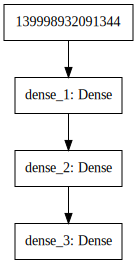

In [0]:
#check out the issue, the code is not working
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(classifier).create(prog='dot', format='svg'))

In [0]:
classifier.layers

In [0]:
for layer in classifier.layers:
    print layer.input_shape #how the input data is coming to hidden/dense layers


(None, 11)
(None, 6)
(None, 6)


You can get to know that: there is no activation function present "in" the first layer neurons at all. the very first layer is your raw data so no activation function. 

The next layer (i.e. the 1st hidden layer) applies the activation function as well as all subsequent layers. 

In [0]:
for layer in classifier.layers:
    print layer.output_shape



(None, 6)
(None, 6)
(None, 1)


# Classification using Iris Dataset

In [0]:
# Importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import numpy
import pandas as pd

In [0]:
training_dataset = pd.read_csv('/content/drive/My Drive/App/iris_training.csv')
features_train = training_dataset.iloc[:, 0:4].values
labels_train = training_dataset.iloc[:, 4].values

In [0]:
training_dataset.head()

,SepalLength,SepalWidth,PentalLength,PentalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [0]:
# Import testing dataset
test_dataset = pd.read_csv('/content/drive/My Drive/App/iris_test.csv')
features_test = test_dataset.iloc[:, 0:4].values
labels_test = test_dataset.iloc[:, 4].values

In [0]:
test_dataset.sample()

,SepalLength,SepalWidth,PentalLength,PentalWidth,Species
21,5.6,3.0,4.5,1.5,1


In [0]:
# Encoding training dataset
encoding_labels_train = np_utils.to_categorical(labels_train)

# Encoding training dataset
encoding_labels_test = np_utils.to_categorical(labels_test)

In [0]:
encoding_labels_train[0]

array([0., 0., 1.], dtype=float32)

In [0]:
# Creating a model
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compiling model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
# Training a model
model.fit(features_train, encoding_labels_train, epochs=300, batch_size=10)

Epoch 1/300
120/120 [==============================] - 0s 2ms/step - loss: 1.5616 - acc: 0.3000
Epoch 2/300
120/120 [==============================] - 0s 378us/step - loss: 1.2922 - acc: 0.3000
Epoch 3/300
120/120 [==============================] - 0s 395us/step - loss: 1.1410 - acc: 0.3000
Epoch 4/300
120/120 [==============================] - 0s 398us/step - loss: 1.0982 - acc: 0.3500
Epoch 5/300
120/120 [==============================] - 0s 399us/step - loss: 1.0775 - acc: 0.3500
Epoch 6/300
120/120 [==============================] - 0s 459us/step - loss: 1.0580 - acc: 0.3500
Epoch 7/300
120/120 [==============================] - 0s 429us/step - loss: 1.0324 - acc: 0.3500
Epoch 8/300
120/120 [==============================] - 0s 404us/step - loss: 1.0126 - acc: 0.3500
Epoch 9/300
120/120 [==============================] - 0s 433us/step - loss: 0.9934 - acc: 0.4333
Epoch 10/300
120/120 [==============================] - 0s 412us/step - loss: 0.9702 - acc: 0.5417
Epoch 11/300
120/120 

In [0]:
# Evaluate the model
scores = model.evaluate(features_test, encoding_labels_test)
print("\nAccuracy: %.2f%%" % (scores[1]*100))

30/30 [==============================] - 0s 2ms/step

Accuracy: 93.33%


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.count_params()

193